In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
data = df.copy()
print('loaded')

loaded


In [2]:
data.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:

#data.isnull().sum() == 0

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
#Get percentage of response
data.SurveyEase.value_counts(normalize = True).sort_values()

Difficult                     0.013513
Neither easy nor difficult    0.318057
Easy                          0.668430
Name: SurveyEase, dtype: float64

In [85]:
data.EdLevel.value_counts().sort_values()

I never completed any formal education                                                  493
Professional degree (JD, MD, etc.)                                                      800
Primary/elementary school                                                               941
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Associate degree (A.A., A.S., etc.)                                                    1843
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Some college/university study without earning a degree                                 7239
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Name: EdLevel, dtype: int64

<AxesSubplot:>

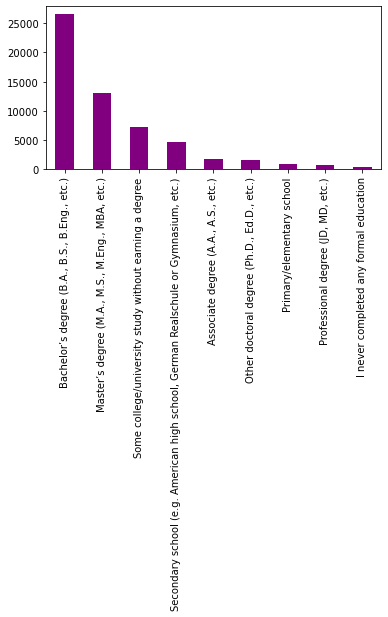

In [92]:
data.EdLevel.value_counts().plot(kind='bar', figsize=(6,3), color='#800080')

<AxesSubplot:>

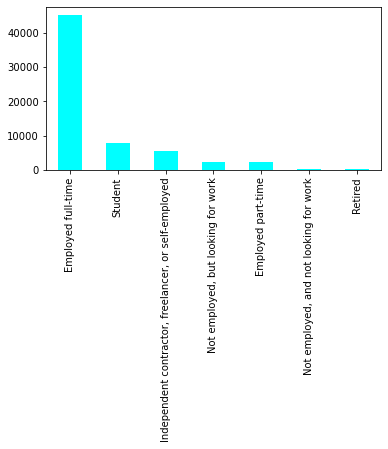

In [91]:
data.Employment.value_counts().plot(kind='bar', figsize=(6,3), color='#00FFFF')

In [42]:
nig = data[data.Country == 'Nigeria']
nig.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
252,254,I am a developer by profession,Yes,27.0,18,Monthly,200000.0,6588.0,Nigeria,Nigerian naira,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",ASP.NET Core;React.js,ASP.NET;ASP.NET Core,A lot more welcome now than last year,40.0,3,Less than 1 year
958,962,I am a developer by profession,Yes,NaN,18,Monthly,50000.0,1644.0,Nigeria,Nigerian naira,...,Easy,Too long,No,"Computer science, computer engineering, or sof...",Django;Drupal;Express;Flask;Gatsby;Ruby on Rails,Angular;Angular.js;ASP.NET;ASP.NET Core;jQuery...,A lot less welcome now than last year,20.0,12,10
1610,1618,I am a student who is learning to code,Yes,24.0,21,NaN,NaN,NaN,Nigeria,NaN,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js;Django;jQuery;Laravel;React.js,Angular.js;jQuery;React.js,Somewhat less welcome now than last year,NaN,2,NaN
2754,2767,I code primarily as a hobby,Yes,18.0,16,NaN,NaN,NaN,Nigeria,NaN,...,Neither easy nor difficult,Appropriate in length,No,NaN,Django;Express;Flask;React.js,Django;React.js,Somewhat more welcome now than last year,NaN,3,NaN
3032,3046,I code primarily as a hobby,Yes,NaN,19,NaN,NaN,NaN,Nigeria,NaN,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Angular;Express;React.js;Vue.js,Angular;Express;jQuery;React.js;Vue.js,Somewhat more welcome now than last year,NaN,5,NaN


In [58]:
nig_col = nig.select_dtypes(include=['float'])
nig_col.columns     

Index(['Age', 'CompTotal', 'ConvertedComp', 'WorkWeekHrs'], dtype='object')

In [57]:
AvgHrs = nig.WorkWeekHrs.mean()
AvgAge = nig.Age.mean()

print('Agerage Nigerian Age is', AvgAge)
print('Average Nigerian Working Hours is', AvgHrs)

Agerage Age is 25.67048710601719
Average Working Hours is 38.67179487179487


In [69]:
over50 = data[data.Age >= 50]
under25 = data[data.Age <= 25]

In [59]:
data.SurveyEase.value_counts()

Easy                          34626
Neither easy nor difficult    16476
Difficult                       700
Name: SurveyEase, dtype: int64

In [70]:
SE_ovr50 = over50.SurveyEase.value_counts(normalize=True)
SE_und25 = under25.SurveyEase.value_counts(normalize=True)

# print(SE_und50)
# print(SE_und25)
print('Survey ease for respondents over the age of 50')
print(SE_ovr50)
print('Survey ease for respondents under the age of 25')
print(SE_und25)

Survey ease for respondents under the age of 50
Easy                          0.694160
Neither easy nor difficult    0.297815
Difficult                     0.008025
Name: SurveyEase, dtype: float64
Survey ease for respondents under the age of 25
Easy                          0.671682
Neither easy nor difficult    0.316253
Difficult                     0.012065
Name: SurveyEase, dtype: float64


In [73]:
print(over50.shape)
print(under25.shape)

(2270, 61)
(14565, 61)


In [81]:
#total number of Nigerians Under 50 that found the surevy easy
nig50 = data[(data.Age <= 50) & (data.SurveyEase == 'Difficult') & (data.Country == 'Nigeria')]
print(len(nig50))

4


In [96]:
#Multichoice Question
# data.LanguageDesireNextYear.head()
data.LanguageDesireNextYear.str.contains('Python').value_counts(normalize=True)

False    0.506921
True     0.493079
Name: LanguageDesireNextYear, dtype: float64

In [98]:
langs_lst = data.LanguageDesireNextYear.str.split(';', expand=True)
langs_lst.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,C#,HTML/CSS,JavaScript,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Python,Swift,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Objective-C,Python,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Java,Ruby,Scala,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


<AxesSubplot:>

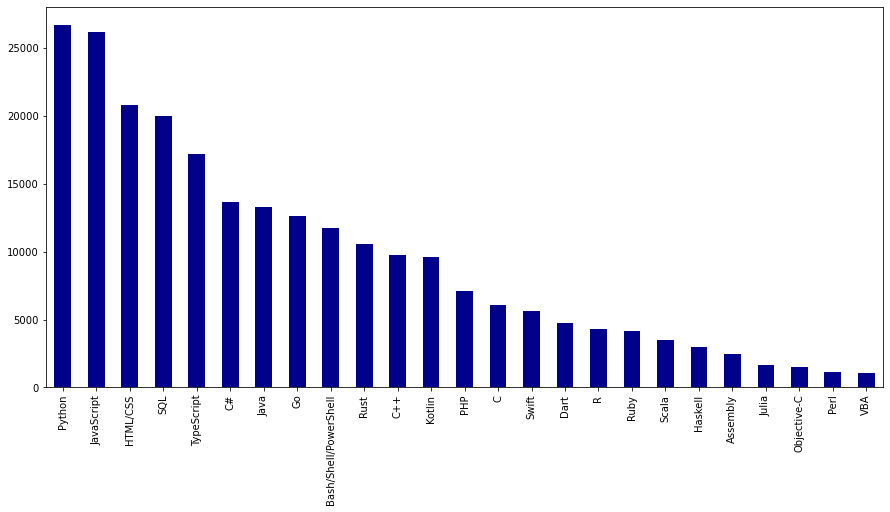

In [110]:
langs = langs_lst.stack()
langs.value_counts().plot(kind='bar', figsize=(15,7), color='#00008B')

In [115]:
job = data.DevType.str.split(';', expand=True)
jobs = job.stack()

In [119]:
jobs.value_counts()

Developer, back-end                              27228
Developer, full-stack                            27125
Developer, front-end                             18296
Developer, desktop or enterprise applications    11784
Developer, mobile                                 9482
DevOps specialist                                 5969
Database administrator                            5722
Designer                                          5321
System administrator                              5242
Developer, embedded applications or devices       4750
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Developer, QA or test                             3947
Engineer, data                                    3738
Academic researcher                               3552
Educator                                          2928
Developer, game or graphics                       2789
Engineering manager                               2724
Product ma

<AxesSubplot:>

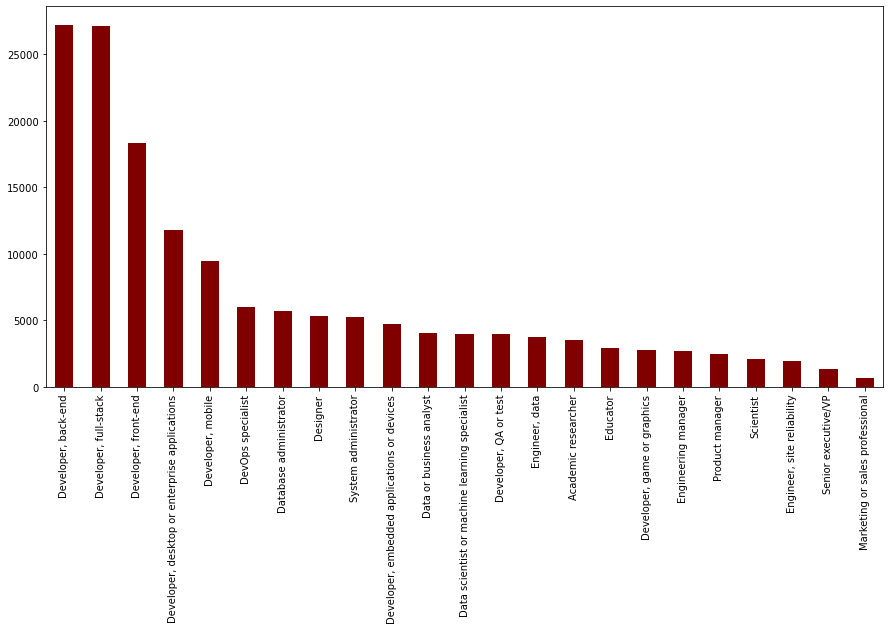

In [118]:
jobs.value_counts().plot(kind='bar', figsize=(15,7), color='#800000')